In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',100)

In [2]:
sns.set_palette("PuBu_d")
sns.set_style('whitegrid')

## Ejemplo 1 Regresión Lineal Simple: Salarios

In [38]:
data_salary=pd.read_csv('../data/Salary_Data.csv')


In [39]:
data_salary.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [40]:
data_salary.describe(np.arange(.1,1,.1))

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
10%,1.950000,43161.600000
20%,2.980000,55524.200000
30%,3.550000,57043.800000
40%,4.000000,60726.600000
50%,4.700000,65237.000000
60%,5.540000,82053.000000


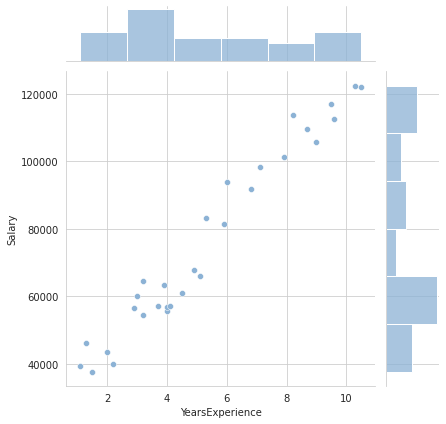

In [41]:
sns.jointplot(x='YearsExperience',y='Salary',data=data_salary)

In [42]:
X=data_salary['YearsExperience'].values
y=data_salary['Salary'].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [45]:
from sklearn.linear_model import LinearRegression


In [46]:
X_train

array([ 2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3, 10.5,  3. ,  2.2,  5.9,
        6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,  4.9,  4. ])

In [12]:
X_train.reshape(-1, 1)

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [47]:
regressor = LinearRegression()

In [48]:
regressor.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [49]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [50]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

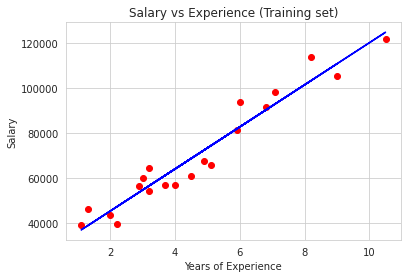

In [17]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1,1)), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


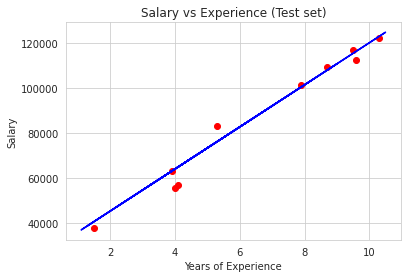

In [18]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train.reshape(-1,1)), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Ejemplo 2  Regresión Lineal Múltiple: Startups

In [51]:
data_startup=pd.read_csv('../data/50_Startups.csv')


In [52]:
data_startup.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [53]:
data_startup['State'].value_counts(1)

California    0.34
New York      0.34
Florida       0.32
Name: State, dtype: float64

In [22]:
data_startup.describe(np.arange(.1,1,.1))

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
10%,14086.703000,85013.773000,34814.225000,65172.905000
20%,28509.592000,99708.036000,103936.952000,80452.590000
30%,46302.455000,110019.628000,139791.153000,96642.813000
40%,64162.370000,116516.764000,181158.780000,100577.820000
50%,73051.080000,122699.795000,212716.240000,107978.190000
60%,78163.654000,127575.200000,254204.126000,120195.162000


In [23]:
dumm=pd.get_dummies(data_startup['State'])

In [24]:
dumm

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [54]:
data_startup=pd.concat([data_startup,dumm],axis=1)

In [55]:
data_startup.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.2,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.7,151377.59,443898.53,California,191792.06,1,0,0


In [27]:
X_startup = data_startup[['R&D Spend','Administration','Marketing Spend','California','Florida']].values
y_startup = data_startup.Profit

In [28]:
X_startup

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00,
        1.00

In [56]:
X_train_startup, X_test_startup, y_train_startup, y_test_startup = train_test_split(X_startup, y_startup, test_size = .2, random_state = 0)

In [57]:
from sklearn.linear_model import LinearRegression
regressor_startup = LinearRegression()
regressor_startup.fit(X_train_startup, y_train_startup)

LinearRegression()

In [58]:
y_pred_startup = regressor_startup.predict(X_test_startup)

In [59]:
y_pred_startup

array([103015.20159776, 132582.27760831, 132447.73845184,  71976.09851266,
       178537.4822107 , 116161.24230157,  67851.69209689,  98791.73374679,
       113969.43533008, 167921.06569569])

In [33]:
type(y_test_startup)

pandas.core.series.Series

In [60]:
predicciones=\
pd.concat([pd.Series(y_test_startup).reset_index(drop=True),pd.Series(y_pred_startup)], axis=1).reset_index().drop(columns='index').rename(columns={'Profit':'y_test',0:'y_pred'})

In [61]:
predicciones

,y_test,y_pred
0,103282.38,103015.201598
1,144259.40,132582.277608
2,146121.95,132447.738452
3,77798.83,71976.098513
4,191050.39,178537.482211
5,105008.31,116161.242302
6,81229.06,67851.692097
7,97483.56,98791.733747
8,110352.25,113969.435330
9,166187.94,167921.065696


In [36]:
import cufflinks as cf
cf.go_offline()

In [37]:
predicciones.iplot()